<a href="https://colab.research.google.com/github/shrad1997/Random_Forest/blob/main/Random_forest_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("/content/Fraud_check (1).csv")

In [3]:
df.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df=df.rename(columns={ 'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'})

In [6]:
df.describe()

,Taxable_Income,City_Population,Work_Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
status=pd.cut(df.Taxable_Income,bins=[0,30000,99619],labels=['Risky','Good'])

In [8]:
df.insert(6,"status",status)

In [9]:
df=df.drop("Taxable_Income",axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    object  
 1   Marital_Status   600 non-null    object  
 2   City_Population  600 non-null    int64   
 3   Work_Experience  600 non-null    int64   
 4   Urban            600 non-null    object  
 5   status           600 non-null    category
dtypes: category(1), int64(2), object(3)
memory usage: 24.2+ KB


In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Marital_Status']= label_encoder.fit_transform(df['Marital_Status'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['status']= label_encoder.fit_transform(df['status'])

In [12]:
df.head(5)

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital_Status   600 non-null    int64
 2   City_Population  600 non-null    int64
 3   Work_Experience  600 non-null    int64
 4   Urban            600 non-null    int64
 5   status           600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [14]:
 #Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[:,0:5]
Y = df.iloc[:,5]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.745


In [15]:
model.fit(X,Y)

RandomForestClassifier(max_features=3)

In [16]:
model.estimators_

[DecisionTreeClassifier(max_features=3, random_state=603368772),
 DecisionTreeClassifier(max_features=3, random_state=2054014287),
 DecisionTreeClassifier(max_features=3, random_state=97854252),
 DecisionTreeClassifier(max_features=3, random_state=260013154),
 DecisionTreeClassifier(max_features=3, random_state=482560121),
 DecisionTreeClassifier(max_features=3, random_state=2080128207),
 DecisionTreeClassifier(max_features=3, random_state=2106059154),
 DecisionTreeClassifier(max_features=3, random_state=534800831),
 DecisionTreeClassifier(max_features=3, random_state=472514239),
 DecisionTreeClassifier(max_features=3, random_state=1702153033),
 DecisionTreeClassifier(max_features=3, random_state=1798321573),
 DecisionTreeClassifier(max_features=3, random_state=476304416),
 DecisionTreeClassifier(max_features=3, random_state=1371150712),
 DecisionTreeClassifier(max_features=3, random_state=1905034950),
 DecisionTreeClassifier(max_features=3, random_state=520951323),
 DecisionTreeClassi

[Text(318.1130527712264, 526.6125000000001, 'X[2] <= 76371.5\ngini = 0.314\nsamples = 370\nvalue = [483, 117]'),
 Text(102.2561320754717, 492.63750000000005, 'X[2] <= 54275.0\ngini = 0.219\nsamples = 113\nvalue = [168, 24]'),
 Text(68.69716981132075, 458.6625, 'X[2] <= 52504.0\ngini = 0.294\nsamples = 61\nvalue = [87, 19]'),
 Text(48.9566037735849, 424.6875, 'X[4] <= 0.5\ngini = 0.247\nsamples = 55\nvalue = [83, 14]'),
 Text(28.42641509433962, 390.7125, 'X[2] <= 32282.0\ngini = 0.405\nsamples = 30\nvalue = [33, 13]'),
 Text(12.633962264150943, 356.7375, 'X[2] <= 28452.5\ngini = 0.153\nsamples = 7\nvalue = [11, 1]'),
 Text(6.316981132075472, 322.76250000000005, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(18.950943396226414, 322.76250000000005, 'gini = 0.0\nsamples = 6\nvalue = [11, 0]'),
 Text(44.218867924528304, 356.7375, 'X[1] <= 0.5\ngini = 0.457\nsamples = 23\nvalue = [22, 12]'),
 Text(31.58490566037736, 322.76250000000005, 'X[3] <= 12.5\ngini = 0.298\nsamples = 5\nvalue = [2,

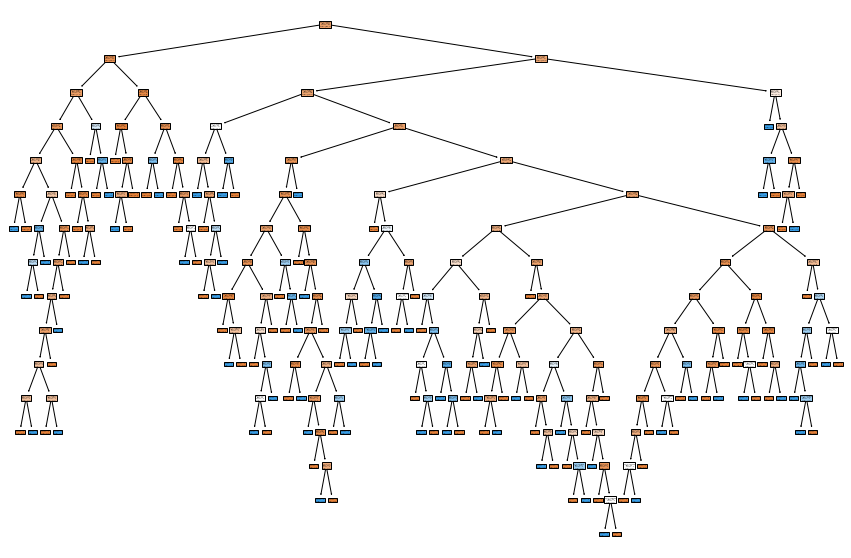

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(model.estimators_[99],filled=True)

In [18]:
y_pred=model.predict(X)

In [19]:
md=pd.Series(y_pred)
df['Predicted_values']=md # creating a  new column and assigning it to new column 
df.head(5)

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,status,Predicted_values
0,0,2,50047,10,1,0,0
1,1,0,134075,18,1,0,0
2,0,1,160205,30,1,0,0
3,1,2,193264,15,1,0,0
4,0,1,27533,28,0,0,0


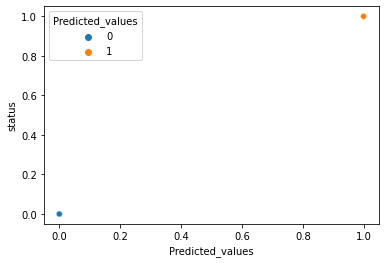

In [20]:
import seaborn as sns
sns.scatterplot(data=df,x="Predicted_values",y="status",hue="Predicted_values")